In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('../data/HR-Employee-Attrition.csv')


df_model = df.copy()
df_model['Attrition'] = df_model['Attrition'].map({'Yes': 1, 'No': 0})

# Dropping unnecessary columns
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df_model.drop(columns=drop_cols, inplace=True, errors='ignore')

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [18]:
# Features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Attrition rate in train set:\n", y_train.value_counts(normalize=True))


Train shape: (1176, 44)
Test shape: (294, 44)
Attrition rate in train set:
 Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64


c:\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression Results
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       247
           1       0.31      0.68      0.43        47

    accuracy                           0.71       294
   macro avg       0.62      0.70      0.62       294
weighted avg       0.82      0.71      0.74       294

Confusion Matrix:


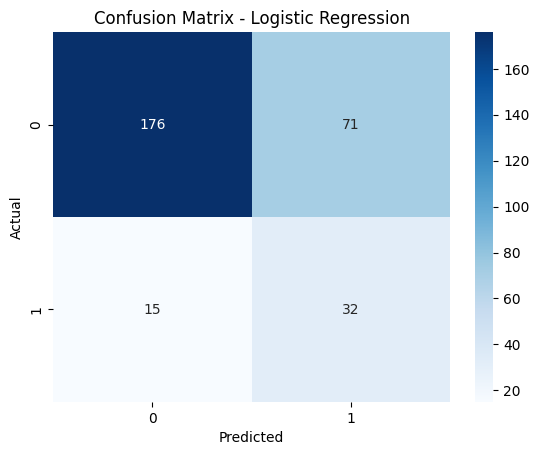

 Random Forest Results
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294

Confusion Matrix:


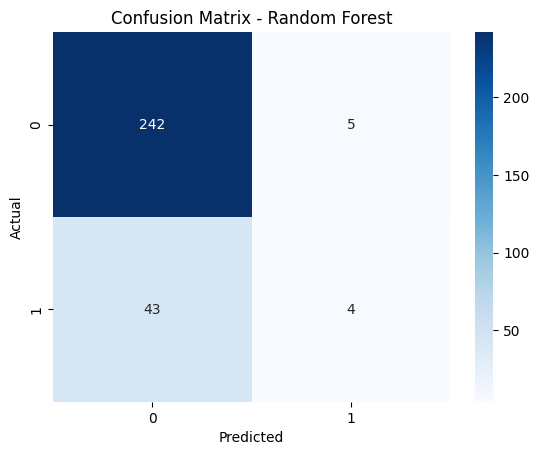

 XGBoost Results
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.53      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294

Confusion Matrix:


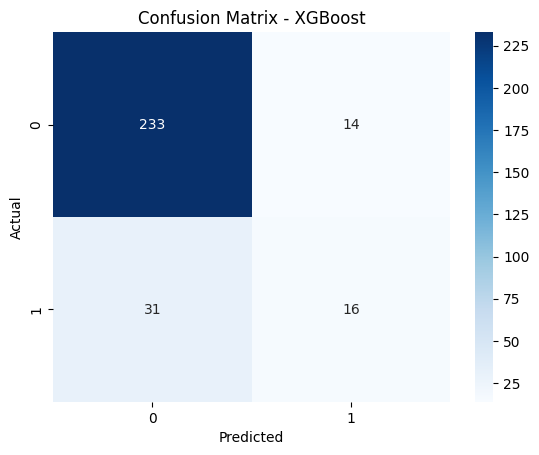


Model Comparison:


,Model,F1 Score,ROC AUC
0,Logistic Regression,0.426667,0.760875
2,XGBoost,0.415584,0.746404
1,Random Forest,0.142857,0.751486


In [19]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Store models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=4, random_state=42)
}

# Create an empty results table
results = []

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Scores
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    results.append({
        'Model': name,
        'F1 Score': f1,
        'ROC AUC': roc
    })
    
    print(f" {name} Results")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display comparison results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\nModel Comparison:")
display(results_df)


In [20]:
#After comparing all the models , I will go with Logistic regression 
final_model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
final_model.fit(X_train,y_train)

y_pred=final_model.predict(X_test)
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       247
           1       0.31      0.68      0.43        47

    accuracy                           0.71       294
   macro avg       0.62      0.70      0.62       294
weighted avg       0.82      0.71      0.74       294


Confusion Matrix:
 [[176  71]
 [ 15  32]]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Fine tuning the model to improve the performnace 
from sklearn.model_selection import GridSearchCV

# Define model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Try different regularization levels
    'penalty': ['l2'],                  # L2 is default; can try 'l1' with 'liblinear'
    'class_weight': ['balanced', None],# Compare weighted vs. unweighted
    'solver': ['lbfgs']                 # 'lbfgs' supports L2; use 'liblinear' for L1
}

# GridSearchCV with F1 scoring
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Best model
best_logreg = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred_best = best_logreg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       247
           1       0.31      0.68      0.43        47

    accuracy                           0.71       294
   macro avg       0.62      0.70      0.62       294
weighted avg       0.82      0.71      0.74       294

Confusion Matrix:
 [[176  71]
 [ 15  32]]


In [31]:
import joblib
import os

# Make sure the target folder exists
os.makedirs("app", exist_ok=True)

# Save the model
joblib.dump(best_logreg, "app/final_logreg_model.pkl")

['app/final_logreg_model.pkl']